# Introduction to corpus analysis

Today we are going to get familiar with language analysis with mixed, but mostly statistical methods.

## Terms

There are few key terms associated with the methods we need to know.

### Corpus

Corpus (plural *corpora*) is a language dataset made of either list of words or text/s, usually in structured way e.g. our list of tweets or wikipedia pages could be perceived as such. Besides text corpora there are also dictionary corpora containging lists of single words. Words could be either in their basic form (e.g. 'act') or with suffixes (e.g. 'actor', 'acting'). These are used by linguists often to make annotations, in other words tagging process, which helps in more sophisticated research as sentiment analysis. You can use already prepared dictionaries or make your own one based upon your source corpora.

### Two strategies towards corpus

Two main strategies are used towards natural language analysis in texts: corpus-based and corpus-driven.

#### Corpus-based approach

In corpus-based method we use corpus to verify our intuitative assumptions about language phenomena using either selected data from our own corpus (before investigating it) or already existing corpora and dictionaries (such as langauge or sentiment dictionaries). Imagine you would like to find how many times certain words occur in the corpora without knowing whether these words are even in the analyzed text. Another example, you would like to verify whether certain phrase from other corpora 'works' in the same way as in yours. This approach is used to verify preassumed hypotheses - note that this may limit your perception of the corpus characteristic!

#### Corpus-driven approach

Corpus-driven approach should not be treated as antithesis of the latter. The main change here is that we do not use pre-existing dictionaries or datasets to investigate our corpora. Hence, the source texts serve as THE only corpora without language preassumptions or hypothesis. The questions emerge during corpus analysis. Any conclusions or claims are made exclusively on the basis of corpus observations. In practise you create dictionaries and occurences based upon the corpus itself e.g. you count number of words or create language phrases from the text (by n-grams - see below). Note that this approach has its own limits as well e.g. misspelling should be taken under consideration!

### Token

A token is an instance of a sequence of characters that are grouped together as a useful semantic unit e.g.

* word : 'bird'
* name : 'Boris'
* acronym : 'USA'

Tokens are ussually separated by punctuation e.g. space, comma, dot etc.

Tokenization is a process of dividing character sequences into smaller pieces (tokens) e.g. sequence *'Lore ipsum dolor sit amet'* into:

* 'Lore'
* 'ipsum'
* 'dolor'
* 'sit'
* 'amet'

In this case the separator is space.

### Lemma

Lemma (plural *lemmas* or *lemmata*) is a form of a word that appears as an entry in a dictionary and is used to represent all the other possible forms. 
Examples:

* the lemma "build" represents: "builds", "building", "built"
* the lemma "good" represents: "better", "best"

We create lemmas in lemmatization process which 'converts' all inflected variations of the specific word into its lemma. Hence, we can perform 'pure' statistic of words frequencies without having multiple variations of them or conduct further analyses e.g. calculating N-grams.

### Stem

Shortly speaking stem is a root form of a given word.

Stem never changes while inflected. e.g. lemma for 'produced' is 'produce', but the stem is 'produc-'.

* stem : 'produc'

* lemma : 'procude'

* words variation: 'producing', 'production', 'productive'

So stem is a shared sequence of characters of group of words while lemma is a basic form for all variations of the original word.

Stemming is used for more general grouping of similar words. Stems are used widely in search engines. Moreover stemming is particulary usefull due to the fact of not-missing words that could not be included while lemmatization process which is  influenced by misspelling (so the algorithm cannot match and convert the word because its form is not the same as in dictionary it uses). The downside is we lose the specific context of the word in corpus e.g. 'actor' and 'acting' may be used in different contexts (as a verb or noun etc.).

### Stop words

Stop words are a words filtered out (this process is called data-cleansing) before performing further analyses on the corpus. Stop word lists vary due to the research hypothesis we wish to verify. In most examples stop words are the most frequent words that do not have any valuable information for us e.g. articles, pronouns, conjuctions etc. However it all depend on the questions ask our corpus, so you can expand the list (sometimes by adding all numerical data to stop words) or modify existing ones.

### Regular expression

A regular expression (regex) is a sequence of characters (e.g. word) that define a search pattern. Regular expression is used in pattern matching throughout corpus (similar to MS Word 'CTRL + F' or a 'find' button on Wikipedia).

### N-gram

N-gram is a linguistic model, a sequence of *n* tokens that appear together e.g.:

* 'Angela Merkel' (bi-gram, 2-gram)

* 'lore ipsum sit' (tri-gram, 3-gram)

We can make bi-grams from our  tri-gram as well:

* 'lore ipsum'

* 'ipsum sit'

N-grams are used to determine most frequent phrases:

* noun + noun e.g. 'Angela Merkel'

* adjective + noun e.g. 'good dog'

N-grams are also used in linguistic probability which will be discusses during class on mutual information.

### Sentiment Analysis

Sentiment Analysis (sometimes known as Opinion Mining) is a measure used to identify the affectivness (emotional bias) of the word, phrase or text. Such analysis measures the polarity of the data, usually in 3-points scale: negative, positivie, neutral bias. There are different approaches of measuring polarity:

* 3-points scale

* 5-points scale: strongly negative, negative, neutral, positive, strongly positive

* -1 to 1 scale, in which we calculate 'average' sentiment (where -1 represents negative and 1 positive bias)

Besides statistical approach sometimes you may encounter qualitative one where sentiment words are annotated to specific 'emotional groups' e.g. 'love', 'hate', 'fear', 'anger' etc. This method is based upon regex matching with pre-prepared annoated dictionary.

#### Lexicon-based sentiment analysis

The Lexicon-based approach uses pre-prepared sentiment lexicon (annotated dictionaries) to score a document by aggregating the sentiment scores of all the words in the document e.g. 'bad' : -1, 'good' : 1, 'bird' : 0. Such lexicons are already online (be aware of their imperfections!) or you can create and annotate your own one using corpus-driven approach. Tagging process can involve preassumptions about the specific context of the corpus origin (e.g. where knowing the stance of a politican on specific issues you can involve your knowledge while tagging sentiment for non obvious cases like 'sacrifice' or 'Auschwitz').

#### Word-wise, sentence-wise, text-wise

Sentiment analysis can be performed on three different levels:

* word-wise/n-gram wise (number or frequency of sentiment biased words and phrases)

* sentence-wise in which we analyze sentiment over a whole sentence

* text-wise where we analyze sentiment bias for the corpus

## Preprocessing

Before any analyzes of the text we need to preprocess the data, including remove punctuation, stop words and perform lemmatization/stemming. 

The first step is loading data from files. We are going to use articles from Wikipedia scrapped at first classes.

In [15]:
article_titles = ["angela_merkel", "cicero", "thermopylae", "waterloo"]
articles = {}
for title in article_titles:
    with open(f"data_scraped/{title}_text.txt", "r", encoding="utf8") as file:
        text = file.read()
        text = text.replace("\n", "") # remove new line
        articles[title] = text

We can check number of characters in each article, using `len` function:

In [16]:
for title, article in articles.items():
    print(f"{title} - number of characters: {len(article)}")

angela_merkel - number of characters: 61635
cicero - number of characters: 51515
thermopylae - number of characters: 56537
waterloo - number of characters: 108117


### Tokenization

Tokenization is the process of splitting data into tokens. Function `sent_tokenize` from `nltk` package can be utilized to split text into separate sentences:

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\atrzo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.tokenize import sent_tokenize

sent_tokenize(articles['cicero'])

['Marcus Tullius Cicero ( SISS-ə-roh; Latin: [ˈmaːrkʊs ˈtʊlːijʊs ˈkɪkɛroː]; 3 January 106 BC – 7 December 43 BC) was a Roman statesman, lawyer, scholar, philosopher, and academic skeptic, who tried to uphold optimate principles during the political crises that led to the establishment of the Roman Empire.',
 "His extensive writings include treatises on rhetoric, philosophy and politics, and he is considered one of Rome's greatest orators and prose stylists.",
 'He came from a wealthy municipal family of the Roman equestrian order, and served as consul in 63 BC.His influence on the Latin language was immense.',
 'He wrote more than three-quarters of extant Latin literature that is known to have existed in his lifetime, and it has been said that subsequent prose was either a reaction against or a return to his style, not only in Latin but in European languages up to the 19th century.',
 'Cicero introduced into Latin the arguments of the chief schools of Hellenistic philosophy and created

We can again compute number of sentences in each article (again using function `len`):

In [20]:
for title, article in articles.items():
    print(f"{title} - number of sentences: {len(sent_tokenize(article))}")

angela_merkel - number of sentences: 307
cicero - number of sentences: 339
thermopylae - number of sentences: 412
waterloo - number of sentences: 596


To split text into separate words, function `word_tokenize` can be utilized:

In [21]:
from nltk.tokenize import word_tokenize

word_tokenize(articles['cicero'])

['Marcus',
 'Tullius',
 'Cicero',
 '(',
 'SISS-ə-roh',
 ';',
 'Latin',
 ':',
 '[',
 'ˈmaːrkʊs',
 'ˈtʊlːijʊs',
 'ˈkɪkɛroː',
 ']',
 ';',
 '3',
 'January',
 '106',
 'BC',
 '–',
 '7',
 'December',
 '43',
 'BC',
 ')',
 'was',
 'a',
 'Roman',
 'statesman',
 ',',
 'lawyer',
 ',',
 'scholar',
 ',',
 'philosopher',
 ',',
 'and',
 'academic',
 'skeptic',
 ',',
 'who',
 'tried',
 'to',
 'uphold',
 'optimate',
 'principles',
 'during',
 'the',
 'political',
 'crises',
 'that',
 'led',
 'to',
 'the',
 'establishment',
 'of',
 'the',
 'Roman',
 'Empire',
 '.',
 'His',
 'extensive',
 'writings',
 'include',
 'treatises',
 'on',
 'rhetoric',
 ',',
 'philosophy',
 'and',
 'politics',
 ',',
 'and',
 'he',
 'is',
 'considered',
 'one',
 'of',
 'Rome',
 "'s",
 'greatest',
 'orators',
 'and',
 'prose',
 'stylists',
 '.',
 'He',
 'came',
 'from',
 'a',
 'wealthy',
 'municipal',
 'family',
 'of',
 'the',
 'Roman',
 'equestrian',
 'order',
 ',',
 'and',
 'served',
 'as',
 'consul',
 'in',
 '63',
 'BC.His',
 '

Here, we can see that there are many 'trash' (such as punctuation) between normal words. We are going to remove them in the next step

Let's word-tokenize each article and compute number of tokens (for further comparison):

In [22]:
articles_tokenized = {}
for title, article in articles.items():
    articles_tokenized[title] = word_tokenize(articles[title])
    print(f"{title} - number of tokens: {len(articles_tokenized[title])}")

angela_merkel - number of tokens: 11056
cicero - number of tokens: 9438
thermopylae - number of tokens: 10614
waterloo - number of tokens: 20242


### Remove punctuation

The following characters are consideres as punctuation:

In [23]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In basic text analyzes punctuation is rather noise than useful information, so we need to remove them from out token set. We can do this, using basic Python set operations:

In [24]:
articles_no_punctuation = {}
for title, article in articles_tokenized.items():
    articles_no_punctuation[title] = [word for word in article if not set(word).issubset(set(string.punctuation))]
    print(f"{title} - number of words: {len(articles_no_punctuation[title])}")

angela_merkel - number of words: 9717
cicero - number of words: 8313
thermopylae - number of words: 9021
waterloo - number of words: 17278


Here, we can see that number of tokens decreases, wich means that unnecessary punctuation-tokens are removed successfully.

### Remove stop words

To remove stop words, we utilize stop words list from `nltk` module for english language. Firstly, we need to download subpackage:

In [25]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atrzo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

Again, we can filter token lists, using basic Python set operations:

In [26]:
from nltk.corpus import stopwords

en_stops = set(stopwords.words('english'))
articles_no_stopwords = {}
for title, article in articles_no_punctuation.items():
    articles_no_stopwords[title] = [word for word in article if word.lower() not in en_stops]
    print(f"{title} - number of words: {len(articles_no_stopwords[title])}")

angela_merkel - number of words: 6029
cicero - number of words: 4921
thermopylae - number of words: 5176
waterloo - number of words: 10574


Here, we can see that number of tokens decreases significantly (almost by a half), wich means that unnecessary stop-words-tokens are removed successfully.

### Lemmatization

To perform lemmatization, we have to install a few other subpackages:

In [27]:
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\atrzo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\atrzo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atrzo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

Let's try one of the basic lemmatizers - `WordMetLemmatizer`.

In [30]:
from nltk.stem import WordNetLemmatizer

sentence = "The largest ball is rolling."

lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(word) for word in word_tokenize(sentence)]

['The', 'largest', 'ball', 'is', 'rolling', '.']

The lemmatizer seems to not working. It is because lemmatizer is not aware of what part of speech (PoS) each word is. To fix this we can use function `pos_tag`, which assigns PoS tag to a given word:

In [31]:
nltk.pos_tag(word_tokenize(sentence))

[('The', 'DT'),
 ('largest', 'JJS'),
 ('ball', 'NN'),
 ('is', 'VBZ'),
 ('rolling', 'VBG'),
 ('.', '.')]

The list of abbreviations can be found [here](https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk).

Now we can create lemmatizing function, taking into account, which PoS is given word (here we are only interested in: adjectives, verbs, nouns and adverbs):

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def nltk_pos_tagger(word):
    nltk_tag = nltk.pos_tag([word])[0][1]
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_with_pos_tag(word):
    pos = nltk_pos_tagger(word)
    lemmatizer = WordNetLemmatizer()
    if pos:
        return lemmatizer.lemmatize(word, pos=pos)
    else:
        return lemmatizer.lemmatize(word)

Let's try to lemmatize the example sentence again:

In [33]:
[lemmatize_with_pos_tag(word) for word in word_tokenize(sentence)]

['The', 'large', 'ball', 'be', 'roll', '.']

Now, it is working as expected, returning lemma of each word. We can perform this operation for the whole dataset:

In [34]:
articles_lemmatized = {}
for title, article in articles_no_stopwords.items():
    articles_lemmatized[title] = [lemmatize_with_pos_tag(word) for word in articles_no_stopwords[title]]
    print(f"{title} - number of words: {len(articles_no_stopwords[title])}")

angela_merkel - number of words: 6029
cicero - number of words: 4921
thermopylae - number of words: 5176
waterloo - number of words: 10574


### Stemming

In [35]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
articles_stemmed = {}
for title, article in articles_no_stopwords.items():
    articles_stemmed[title] = [stemmer.stem(word) for word in articles_lemmatized[title]]
    print(f"{title} - number of words: {len(articles_no_stopwords[title])}")

angela_merkel - number of words: 6029
cicero - number of words: 4921
thermopylae - number of words: 5176
waterloo - number of words: 10574


Number of words should not change, because lemmatization only transfroms tokens into other tokens.

## Basic analyzes

After preprocessing, we proceed to simple analyzes, including computing monograms, bigrams and sentiment.

### Computing monograms

To compute monograms we utilize `CountVectorizer` from `sklearn` module. We can create simple function to perform this task:

In [36]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def compute_monograms(words):
    monograms = pd.DataFrame()
    vectorizer = CountVectorizer(lowercase=True)
    results = vectorizer.fit_transform(words)
    monograms["word"] = vectorizer.get_feature_names_out()
    monograms["occurences"] = np.array(results.sum(axis=0)).flatten()
    return monograms

Testing on one of the articles:

In [38]:
compute_monograms(articles_lemmatized['cicero']).sort_values(by=["occurences"], ascending=False, ignore_index=True)

,word,occurences
0,cicero,240
1,bc,52
2,caesar,42
3,roman,31
4,rome,30
...,...,...
2296,flattering,1
2297,flamboyant,1
2298,fitness,1
2299,fire,1


Here, we perform monograms computing on each step of preprocessing:

In [39]:
monograms_no_punctuation = {}
for title, article in articles_no_punctuation.items():
    monograms_no_punctuation[title] = compute_monograms(article)
monograms_no_stopwords = {}
for title, article in articles_no_stopwords.items():
    monograms_no_stopwords[title] = compute_monograms(article)
monograms_lemmatized = {}
for title, article in articles_lemmatized.items():
    monograms_lemmatized[title] = compute_monograms(article)
monograms_stemmed = {}
for title, article in articles_stemmed.items():
    monograms_stemmed[title] = compute_monograms(article)

and save results into separete files:

In [40]:
import os

try: 
    os.mkdir("results") 
except OSError as error: 
    pass

for title in article_titles:
    monograms_no_punctuation[title].sort_values(by=["occurences"], ascending=False, ignore_index=True).to_csv(f"results/monogram_no_punctuation_{title}.csv")
    monograms_no_stopwords[title].sort_values(by=["occurences"], ascending=False, ignore_index=True).to_csv(f"results/monogram_no_stopwords_{title}.csv")
    monograms_lemmatized[title].sort_values(by=["occurences"], ascending=False, ignore_index=True).to_csv(f"results/monogram_lemmatized_{title}.csv")
    monograms_stemmed[title].sort_values(by=["occurences"], ascending=False, ignore_index=True).to_csv(f"results/monogram_stemmed_{title}.csv")

### Distribution of words

Now, let's analyze distribution of a few chosen words for each of articles. This kind of analyzes is useful for comparing style of texts and even establishing authorship of texts. We have chosen 10 frequently occuring stop words and extracted number of occurences normalized by sum of occurences of every word for given text.

In [41]:
chosen_words = [
    "as",
    "at",
    "and",
    "by",
    "in",
    "of",
    "on",
    "that",
    "the",
    "to",
]

distribution = pd.DataFrame(index=chosen_words)

for title in article_titles:
    monograms = monograms_no_punctuation[title]
    counts = np.zeros(len(chosen_words))
    for i, word in enumerate(chosen_words):
        for row in monograms.iloc:
            if row["word"] == word:
                counts[i] = row["occurences"]
                break
    distribution[title] = counts / monograms["occurences"].sum()

Graphical representation of results:

<AxesSubplot:>

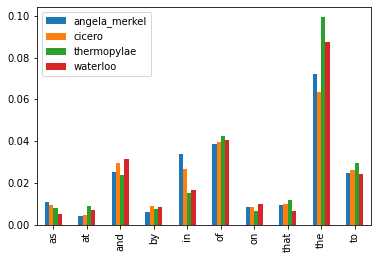

In [42]:
distribution.plot.bar()

We can see that `angela_merkel` and `cicero` differs from `thermopylae` and waterloo in terms of frequency of words `the` and `in`. Other frequencies are similar in all four texts.

### Computing bigrams

Bigrams are useful for analyzing collocation of particular words. This topic will be expanded during next classes. For now, let's simply compute bigrams, analogically to monograms:

In [43]:
def compute_bigrams(words):
    bigrams = pd.DataFrame()
    pairs = [' '.join(sorted(words[i:i+2])) for i in range(len(words)-1)]
    vectorizer = CountVectorizer(lowercase=True, ngram_range=(2,2))
    result = vectorizer.fit_transform(pairs)

    bigrams["word_pair"] = np.array(vectorizer.get_feature_names_out())
    bigrams["occurences"] = np.array(result.sum(axis=0)).flatten()
    return bigrams

Note: here, the pairs of adjacent words are taken into account. Bigram may be also computed many different ways (e.g. sentence-wise - taking into account words appearing in the same sentence, etc.).

Again, computing bigrams for all data:

In [44]:
bigrams_no_punctuation = {}
for title, article in articles_no_punctuation.items():
    bigrams_no_punctuation[title] = compute_bigrams(article)
bigrams_no_stopwords = {}
for title, article in articles_no_stopwords.items():
    bigrams_no_stopwords[title] = compute_bigrams(article)
bigrams_lemmatized = {}
for title, article in articles_lemmatized.items():
    bigrams_lemmatized[title] = compute_bigrams(article)
bigrams_stemmed = {}
for title, article in articles_stemmed.items():
    bigrams_stemmed[title] = compute_bigrams(article)

and saving to files:

In [45]:
import os

try: 
    os.mkdir("results") 
except OSError as error: 
    pass

for title in article_titles:
    bigrams_no_punctuation[title].sort_values(by=["occurences"], ascending=False, ignore_index=True).to_csv(f"results/bigram_no_punctuation_{title}.csv")
    bigrams_no_stopwords[title].sort_values(by=["occurences"], ascending=False, ignore_index=True).to_csv(f"results/bigram_no_stopwords_{title}.csv")
    bigrams_lemmatized[title].sort_values(by=["occurences"], ascending=False, ignore_index=True).to_csv(f"results/bigram_lemmatized_{title}.csv")
    bigrams_stemmed[title].sort_values(by=["occurences"], ascending=False, ignore_index=True).to_csv(f"results/bigram_stemmed_{title}.csv")

### Sentiment analysis

Importing input data. We are going to use Boris Johnson's tweets first

In [46]:
import csv
johnson = pd.read_csv('data_scraped/BorisJohnson_2022-04-01_2022-04-30.csv')

Extracting text data

In [47]:
johnson_tweets = johnson.Embedded_text
print(johnson_tweets)

0     Ramadan Mubarak to all the British Muslims and...
1     I welcome the announcement of a two-month truc...
2     We’re making work pay with a £1,000 salary boo...
3     Ramadan Mubarak to all the British Muslims and...
4     On this day forty years ago the Argentine mili...
                            ...                        
72    It’s fantastic to be out campaigning with \n@C...
73    Good discussions with Swiss President \n@Ignaz...
74    Promising \n@ONS\n statistics show knife crime...
75    Brought together by shared values of freedom &...
76    Brought together by shared values of freedom &...
Name: Embedded_text, Length: 77, dtype: object


We are going to use VADER from NLTK package: https://www.nltk.org/_modules/nltk/sentiment/vader.html

In [49]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

for tweet in johnson_tweets:
    print(sia.polarity_scores(tweet))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.062, 'neu': 0.602, 'pos': 0.335, 'compound': 0.9118}
{'neg': 0.027, 'neu': 0.861, 'pos': 0.112, 'compound': 0.8316}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.098, 'neu': 0.783, 'pos': 0.118, 'compound': 0.0516}
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.7717}
{'neg': 0.15, 'neu': 0.741, 'pos': 0.109, 'compound': -0.3818}
{'neg': 0.181, 'neu': 0.675, 'pos': 0.144, 'compound': -0.5719}
{'neg': 0.186, 'neu': 0.712, 'pos': 0.101, 'compound': -0.6249}
{'neg': 0.044, 'neu': 0.862, 'pos': 0.095, 'compound': 0.418}
{'neg': 0.156, 'neu': 0.756, 'pos': 0.088, 'compound': -0.5796}
{'neg': 0.086, 'neu': 0.665, 'pos': 0.25, 'compound': 0.8779}
{'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'compound': 0.3182}
{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'compound': 0.2732}
{'neg': 0.0, 'neu': 0.956, 'pos': 0.044, 'compound': 0.2732}
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.8687}
{'neg': 0.0, 'neu':

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atrzo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER returns four values. First three (negative, neutral, positive) returns sentiment intensity of each tweet: the scoring is a ratio of the proportion for text that falls into each category (they sum to 1). The last one is an overall tweet sentiment. It is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 

Let's check polarity scores for wikipedia article on Cicero.

In [50]:
print(sia.polarity_scores(articles['cicero']))

{'neg': 0.09, 'neu': 0.796, 'pos': 0.114, 'compound': 0.9997}


As expected the sentiment intensity is mostly around neutral category and overall score of the sentiment matches the general opinion on Cicero as a great philosoper, writer and politician.

Now add Boris Johnson polarity score to our dataframe. First prepare list of scores for each tweet

In [51]:
johnson_score = []
for tweet in johnson_tweets:
    score = sia.polarity_scores(tweet)
    johnson_score.append(score)
print(johnson_score)

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.062, 'neu': 0.602, 'pos': 0.335, 'compound': 0.9118}, {'neg': 0.027, 'neu': 0.861, 'pos': 0.112, 'compound': 0.8316}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.098, 'neu': 0.783, 'pos': 0.118, 'compound': 0.0516}, {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.7717}, {'neg': 0.15, 'neu': 0.741, 'pos': 0.109, 'compound': -0.3818}, {'neg': 0.181, 'neu': 0.675, 'pos': 0.144, 'compound': -0.5719}, {'neg': 0.186, 'neu': 0.712, 'pos': 0.101, 'compound': -0.6249}, {'neg': 0.044, 'neu': 0.862, 'pos': 0.095, 'compound': 0.418}, {'neg': 0.156, 'neu': 0.756, 'pos': 0.088, 'compound': -0.5796}, {'neg': 0.086, 'neu': 0.665, 'pos': 0.25, 'compound': 0.8779}, {'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'compound': 0.3182}, {'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'compound': 0.2732}, {'neg': 0.0, 'neu': 0.956, 'pos': 0.044, 'compound': 0.2732}, {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.8687}, {'

Next we convert list of results into new dataframe and merge it with the existing one

In [52]:
johnson_score_dataframe = pd.DataFrame(johnson_score)

In [53]:
print(johnson_score_dataframe)

      neg    neu    pos  compound
0   0.000  1.000  0.000    0.0000
1   0.062  0.602  0.335    0.9118
2   0.027  0.861  0.112    0.8316
3   0.000  1.000  0.000    0.0000
4   0.098  0.783  0.118    0.0516
..    ...    ...    ...       ...
72  0.062  0.831  0.107    0.3612
73  0.048  0.700  0.252    0.8519
74  0.240  0.594  0.166   -0.6908
75  0.036  0.693  0.272    0.9716
76  0.034  0.704  0.262    0.9716

[77 rows x 4 columns]


In [54]:
new_johnson = johnson.join(johnson_score_dataframe)
new_johnson

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,neg,neu,pos,compound
0,Boris Johnson,@BorisJohnson,2022-04-01T18:59:51.000Z,Boris Johnson\n@BorisJohnson\n·\n1 kwi\nUnited...,Ramadan Mubarak to all the British Muslims and...,NaN,2 477,5 226,"28,2 tys.",['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/150996...,0.000,1.000,0.000,0.0000
1,Boris Johnson,@BorisJohnson,2022-04-01T17:28:37.000Z,Boris Johnson\n@BorisJohnson\n·\n1 kwi\nUnited...,I welcome the announcement of a two-month truc...,NaN,679,334,2 000,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/150994...,0.062,0.602,0.335,0.9118
2,Boris Johnson,@BorisJohnson,2022-04-01T13:52:59.000Z,Boris Johnson\n@BorisJohnson\n·\n1 kwi\nUnited...,"We’re making work pay with a £1,000 salary boo...",NaN,2 048,469,1 626,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/150989...,0.027,0.861,0.112,0.8316
3,Boris Johnson,@BorisJohnson,2022-04-01T18:59:51.000Z,Boris Johnson\n@BorisJohnson\n·\n1 kwi\nUnited...,Ramadan Mubarak to all the British Muslims and...,NaN,2 477,5 226,"28,2 tys.",['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/150996...,0.000,1.000,0.000,0.0000
4,Boris Johnson,@BorisJohnson,2022-04-02T10:45:14.000Z,Boris Johnson\n@BorisJohnson\n·\n2 kwi\nUnited...,On this day forty years ago the Argentine mili...,NaN,6 342,6 937,7 716,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151020...,0.098,0.783,0.118,0.0516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Boris Johnson,@BorisJohnson,2022-04-28T17:50:43.000Z,Boris Johnson\n@BorisJohnson\n·\n28 kwi\nUnite...,It’s fantastic to be out campaigning with \n@C...,NaN,4 714,1 241,5 097,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151973...,0.062,0.831,0.107,0.3612
73,Boris Johnson,@BorisJohnson,2022-04-28T10:46:59.000Z,Boris Johnson\n@BorisJohnson\n·\n28 kwi\nUnite...,Good discussions with Swiss President \n@Ignaz...,NaN,609,520,3 386,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151962...,0.048,0.700,0.252,0.8519
74,Boris Johnson,@BorisJohnson,2022-04-28T14:15:36.000Z,Boris Johnson\n@BorisJohnson\n·\n28 kwi\nUnite...,Promising \n@ONS\n statistics show knife crime...,NaN,1 611,464,2 301,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151968...,0.240,0.594,0.166,-0.6908
75,Boris Johnson,@BorisJohnson,2022-04-29T11:09:28.000Z,Boris Johnson\n@BorisJohnson\n·\n29 kwi\nUnite...,Brought together by shared values of freedom &...,➡,1 165,619,3 203,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151999...,0.036,0.693,0.272,0.9716


We can also extract tweets with only positive sentiment:

In [55]:
positive_new_johnson = new_johnson.loc[new_johnson['compound'] > 0]
positive_new_johnson

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,neg,neu,pos,compound
1,Boris Johnson,@BorisJohnson,2022-04-01T17:28:37.000Z,Boris Johnson\n@BorisJohnson\n·\n1 kwi\nUnited...,I welcome the announcement of a two-month truc...,NaN,679,334,2 000,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/150994...,0.062,0.602,0.335,0.9118
2,Boris Johnson,@BorisJohnson,2022-04-01T13:52:59.000Z,Boris Johnson\n@BorisJohnson\n·\n1 kwi\nUnited...,"We’re making work pay with a £1,000 salary boo...",NaN,2 048,469,1 626,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/150989...,0.027,0.861,0.112,0.8316
4,Boris Johnson,@BorisJohnson,2022-04-02T10:45:14.000Z,Boris Johnson\n@BorisJohnson\n·\n2 kwi\nUnited...,On this day forty years ago the Argentine mili...,NaN,6 342,6 937,7 716,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151020...,0.098,0.783,0.118,0.0516
5,Boris Johnson,@BorisJohnson,2022-04-02T12:00:53.000Z,Boris Johnson\n@BorisJohnson\n·\n2 kwi\nUnited...,"Today is World Autism Awareness Day, and I’ve ...",NaN,607,409,1 792,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151022...,0.000,0.838,0.162,0.7717
9,Boris Johnson,@BorisJohnson,2022-04-04T08:39:03.000Z,Boris Johnson\n@BorisJohnson\n·\n4 kwi\nUnited...,Putin will never break the spirit of Ukraine’s...,NaN,3 377,6 540,"29,3 tys.",['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151089...,0.044,0.862,0.095,0.4180
11,Boris Johnson,@BorisJohnson,2022-04-04T10:09:07.000Z,Boris Johnson\n@BorisJohnson\n·\n4 kwi\nUnited...,73 years ago today the founding members of \n@...,NaN,1 365,1 384,8 196,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151092...,0.086,0.665,0.250,0.8779
12,Boris Johnson,@BorisJohnson,2022-04-05T17:01:17.000Z,Boris Johnson\n@BorisJohnson\n·\n5 kwi\nUnited...,"To the Russian people, look at what is being d...",NaN,4 313,6 254,"18,1 tys.",['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151138...,0.000,0.941,0.059,0.3182
13,Boris Johnson,@BorisJohnson,2022-04-05T13:37:41.000Z,Boris Johnson\n@BorisJohnson\n·\n5 kwi\nUnited...,"Well done Amelia.\nDa iawn Amelia.\nМолодець, ...",🌟,264,434,2 693,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151133...,0.000,0.952,0.048,0.2732
14,Boris Johnson,@BorisJohnson,2022-04-05T13:37:41.000Z,Boris Johnson\n@BorisJohnson\n·\n5 kwi\nUnited...,"Well done Amelia.\nDa iawn Amelia.\nМолодець, ...",🌟,264,434,2 693,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151133...,0.000,0.956,0.044,0.2732
15,Boris Johnson,@BorisJohnson,2022-04-06T10:10:01.000Z,Boris Johnson\n@BorisJohnson\n·\n6 kwi\nUnited...,The Health and Social Care Levy will raise bil...,NaN,2 345,596,2 016,['https://pbs.twimg.com/semantic_core_img/1290...,https://twitter.com/BorisJohnson/status/151164...,0.000,0.815,0.185,0.8687


#### Sentiment comparison

Let's compare Johnson's tweets and von der Leyen

In [56]:
leyen = pd.read_csv('data_scraped/vonderleyen_2022-04-01_2022-04-30.csv')
leyen_tweets = leyen.Embedded_text
leyen_score = []
for tweet in leyen_tweets:
    score = sia.polarity_scores(tweet)
    leyen_score.append(score)
leyen_score_dataframe = pd.DataFrame(leyen_score)
new_leyen = leyen.join(leyen_score_dataframe)
new_leyen

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,neg,neu,pos,compound
0,Ursula von der Leyen,@vonderleyen,2022-04-01T13:35:36.000Z,Ursula von der Leyen\n@vonderleyen\n·\n1 kwi,Important issues remain. China must:\n \n• Sto...,NaN,2 677,1 622,4 399,['https://pbs.twimg.com/media/FPQyZ9VWQAUq82E?...,https://twitter.com/vonderleyen/status/1509887...,0.050,0.838,0.112,0.4144
1,Ursula von der Leyen,@vonderleyen,2022-04-01T13:17:33.000Z,Ursula von der Leyen\n@vonderleyen\n·\n1 kwi,Open and frank exchange today at the Summit\n...,NaN,615,599,1 918,['https://pbs.twimg.com/card_img/1530234118726...,https://twitter.com/vonderleyen/status/1509882...,0.000,0.795,0.205,0.8689
2,Ursula von der Leyen,@vonderleyen,2022-04-01T13:17:33.000Z,Ursula von der Leyen\n@vonderleyen\n·\n1 kwi,Open and frank exchange today at the Summit\n...,NaN,615,599,1 918,['https://pbs.twimg.com/profile_images/1151477...,https://twitter.com/vonderleyen/status/1509882...,0.000,0.810,0.190,0.8689
3,Ursula von der Leyen,@vonderleyen,2022-04-03T10:56:42.000Z,Ursula von der Leyen\n@vonderleyen\n·\n3 kwi,Appalled by reports of unspeakable horrors in ...,NaN,3 739,8 119,"34,1 tys.",[],https://twitter.com/vonderleyen/status/1510571...,0.318,0.682,0.000,-0.9118
4,Ursula von der Leyen,@vonderleyen,2022-04-04T12:56:21.000Z,Ursula von der Leyen\n@vonderleyen\n·\n4 kwi,I spoke with President \n@ZelenskyyUa\n about ...,NaN,1 705,2 658,9 476,['https://pbs.twimg.com/ad_img/151096334240341...,https://twitter.com/vonderleyen/status/1510964...,0.144,0.769,0.087,-0.6597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Ursula von der Leyen,@vonderleyen,2022-04-27T12:18:28.000Z,Ursula von der Leyen\n@vonderleyen\n·\n27 kwi,It comes as no surprise that the Kremlin uses ...,NaN,1 517,1 100,4 018,['https://pbs.twimg.com/profile_images/1151477...,https://twitter.com/vonderleyen/status/1519289...,0.038,0.878,0.084,0.4019
59,Ursula von der Leyen,@vonderleyen,2022-04-28T10:31:15.000Z,Ursula von der Leyen\n@vonderleyen\n·\n28 kwi,"In Europe, the green transition is happening r...",NaN,226,615,2 179,['https://pbs.twimg.com/media/FRa3-OhXsAAt8mD?...,https://twitter.com/vonderleyen/status/1519625...,0.000,0.916,0.084,0.6597
60,Ursula von der Leyen,@vonderleyen,2022-04-28T11:23:44.000Z,Ursula von der Leyen\n@vonderleyen\n·\n28 kwi,The future of the Internet is also the future ...,NaN,487,447,1 465,['https://pbs.twimg.com/media/FRa-IpLXIAEh5Bv?...,https://twitter.com/vonderleyen/status/1519638...,0.021,0.700,0.279,0.9468
61,Ursula von der Leyen,@vonderleyen,2022-04-28T20:01:00.000Z,Ursula von der Leyen\n@vonderleyen\n·\n28 kwi,We stand in solidarity with the EU Member Stat...,NaN,413,673,3 612,[],https://twitter.com/vonderleyen/status/1519768...,0.000,0.825,0.175,0.7717


In [57]:
print('Johnson mean compound is', new_johnson.compound.mean())
print('von der Leyen mean compound is', new_leyen.compound.mean())

Johnson mean compound is 0.46796493506493503
von der Leyen mean compound is 0.43140158730158734


It seems that UK Prime Minister has a slightly more positive overall sentiment. Now let's plot our results:

Text(0.5, 1.0, 'compound comparison')

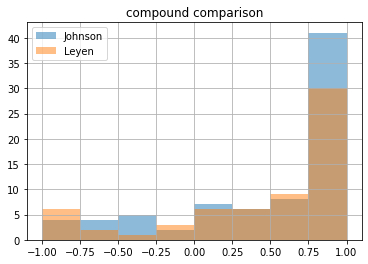

In [58]:
import matplotlib.pyplot as plt

bin_ranges = np.linspace(-1, 1, 9)
transparency = 0.5

new_johnson.compound.hist(bins=bin_ranges, alpha=transparency, label="Johnson")
new_leyen.compound.hist(bins=bin_ranges, alpha=transparency, label="Leyen")

plt.legend()

plt.title("compound comparison")

## Exercise

Now try to do the same for other scraped data